# Investigación sobre regresión y los paises más felices
En este proyecto que hice investigue sobre los paises más felices del mundo segun un estudio y me analizé la variable que yo considere la más importante para el estudio. Queria ver como una regresión me podía ayudar a entender la predicción que puede hacer una inteligencia artificial sobre este asunto con los datos dados.

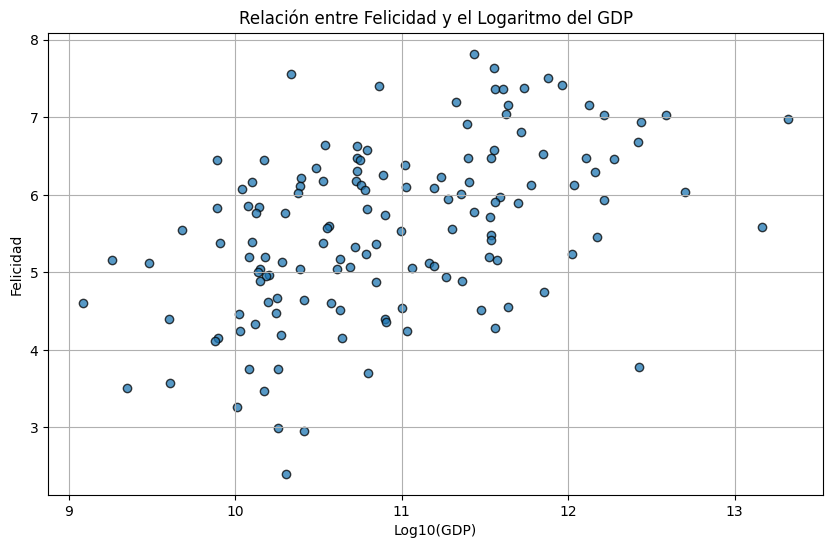

Primeras filas del dataset:
          Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11

Top 10 países con mayor felicidad:
          Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11

Top 10 países con mayor GDP:
               Pais  Felicidad           GDP
15    United States     6.9768  2.089370e+13
70            China     5.5853  1.468770e+13
52            Japan     6.0389  5.040110e+12
13          Germany     7.0341  3.846410e+12
1

In [22]:
# Importación y cargar datos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

# Aplicar logaritmo base 10 al GDP
df['Log_GDP'] = np.log10(df['GDP'])

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Log_GDP'], df['Felicidad'], alpha=0.75, edgecolors='k')

# Configuración de la gráfica
plt.title('Relación entre Felicidad y el Logaritmo del GDP')
plt.xlabel('Log10(GDP)')
plt.ylabel('Felicidad')
plt.grid(True)
plt.show()

df = pd.read_csv('A1.2 Felicidad y GDP.csv')

# Mostrar las primeras filas para entender la estructura de los datos
print("Primeras filas del dataset:")
print(df.head())

# Ordenar los datos de mayor a menor felicidad
df_sorted_happiness = df.sort_values(by='Felicidad', ascending=False)
print("\nTop 10 países con mayor felicidad:")
print(df_sorted_happiness.head(10))

# Ordenar los datos de mayor a menor GDP
df_sorted_gdp = df.sort_values(by='GDP', ascending=False)
print("\nTop 10 países con mayor GDP:")
print(df_sorted_gdp.head(10))

En esta primera parte solamente me di una idea de los datos que estaba viendo y los organize de mayor a peor felicidad y GDP.



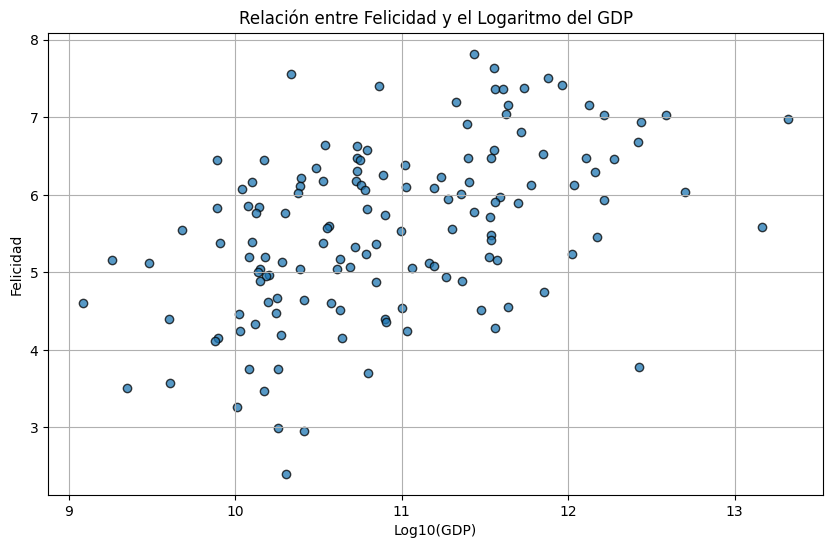

In [23]:
# Aplicar logaritmo base 10 al GDP
df['Log_GDP'] = np.log10(df['GDP'])

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Log_GDP'], df['Felicidad'], alpha=0.75, edgecolors='k')

# Configuración de la gráfica
plt.title('Relación entre Felicidad y el Logaritmo del GDP')
plt.xlabel('Log10(GDP)')
plt.ylabel('Felicidad')
plt.grid(True)
plt.show()


Para visualizarlo mejor, decidí graficarlo para tratar de identificar algún patrón entre las variables.

In [24]:
# Calcular las medias de Log_GDP y Felicidad
x_mean = df['Log_GDP'].mean()
y_mean = df['Felicidad'].mean()

# Calcular la pendiente B1
numerador = sum((df['Log_GDP'] - x_mean) * (df['Felicidad'] - y_mean))
denominador = sum((df['Log_GDP'] - x_mean)**2)
B1 = numerador / denominador

# Calcular el intercepto B0
B0 = y_mean - B1 * x_mean

# Imprimir los coeficientes calculados
print("B1 (pendiente) =", B1)
print("B0 (intercepto) =", B0)


B1 (pendiente) = 0.6281284658810405
B0 (intercepto) = -1.302350057074725


Como práctica hice una regresión lineal paso por paso porque se me hizo muy fácil usar un simpre funciones preestablecida.

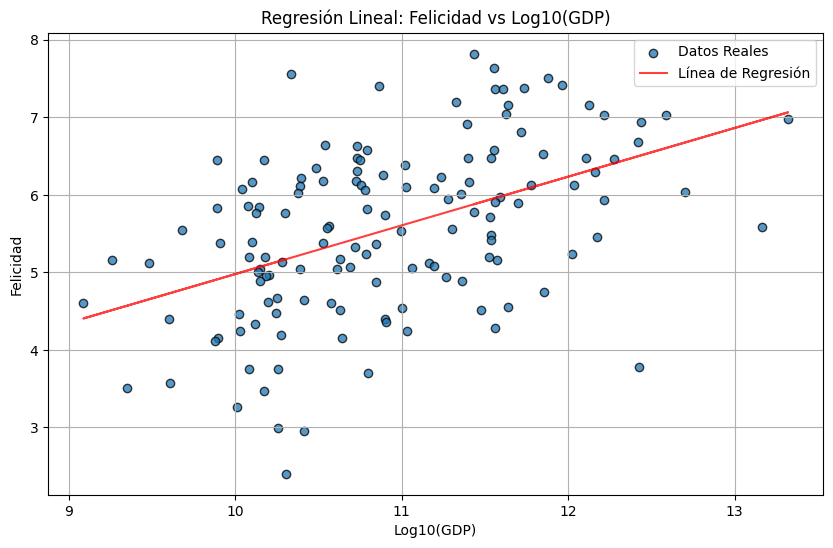

In [25]:
# Generar valores de la recta de regresión
df['Prediccion'] = B0 + B1 * df['Log_GDP']

# Graficar los puntos de datos reales
plt.figure(figsize=(10, 6))
plt.scatter(df['Log_GDP'], df['Felicidad'], alpha=0.75, edgecolors='k', label='Datos Reales')

# Graficar la línea de regresión
plt.plot(df['Log_GDP'], df['Prediccion'], color='red', alpha=0.75, label='Línea de Regresión')

# Configuración de la gráfica
plt.title('Regresión Lineal: Felicidad vs Log10(GDP)')
plt.xlabel('Log10(GDP)')
plt.ylabel('Felicidad')
plt.legend()
plt.grid(True)
plt.show()


Aqui ya con la linea podemos visualizar de manera gráfica como quedaría la linea en nuestro sistema.

In [26]:
# Calcular los residuos (errores entre valores reales y predichos)
df['Residuos'] = df['Felicidad'] - df['Prediccion']

# Calcular RSS (suma de los cuadrados de los residuos)
RSS = sum(df['Residuos'] ** 2)

# Imprimir el resultado del RSS
print("Residual Sum of Squares (RSS) =", RSS)


Residual Sum of Squares (RSS) = 131.3738317732635


Calculamos la Suma Residual de Cuadrados

In [27]:
# Número de observaciones
n = len(df)

# Cálculo del error estándar de B1
SE_B1 = (RSS / ((n - 2) * sum((df['Log_GDP'] - x_mean) ** 2))) ** 0.5

# Calcular el valor crítico t para un intervalo de confianza del 95%
t_crit = stats.t.ppf(0.975, df=n-2)  # Nivel de confianza 95%

# Cálculo del intervalo de confianza
conf_int_lower = B1 - t_crit * SE_B1
conf_int_upper = B1 + t_crit * SE_B1

# Imprimir resultados
print("Error estándar de B1 =", SE_B1)
print(f"Intervalo de confianza al 95% para B1: ({conf_int_lower}, {conf_int_upper})")

# Evaluar la significancia de la relación felicidad-GDP
if conf_int_lower <= 0 <= conf_int_upper:
    print("No se puede concluir que la relación es significativa, ya que el intervalo contiene el 0.")
else:
    print("La relación entre felicidad y GDP es significativa, ya que el intervalo NO contiene el 0.")


Error estándar de B1 = 0.09983378435340727
Intervalo de confianza al 95% para B1: (0.4307393313073309, 0.8255176004547502)
La relación entre felicidad y GDP es significativa, ya que el intervalo NO contiene el 0.


Luego calculamos el error estandar, junto con el valor critico con un nivel de confianza establecido del 95%. Luego calculamos el valor crítico y los intervalos de confianza y aseguramos que no sean cero para ver que la relacion sea significativa.

In [28]:
# Calcular el Residual Standard Error (RSE)
RSE = (RSS / (n - 2)) ** 0.5
print("Error estándar residual (RSE) =", RSE)

# Calcular la suma total de los cuadrados (TSS)
TSS = sum((df['Felicidad'] - y_mean) ** 2)

# Calcular el coeficiente de determinación R^2
R_squared = 1 - (RSS / TSS)
print("Coeficiente de determinación (R^2) =", R_squared)

# Opinión sobre el valor de R^2
if R_squared > 0.7:
    print("El modelo explica bien la variabilidad de la felicidad.")
elif R_squared > 0.4:
    print("El modelo tiene una relación moderada con la felicidad.")
else:
    print("El modelo no explica bien la variabilidad de la felicidad.")


Error estándar residual (RSE) = 0.9721807858537376
Coeficiente de determinación (R^2) = 0.22166361654970712
El modelo no explica bien la variabilidad de la felicidad.


Aqui calculo la R^2 usando antes la suma total de los cuadrados. Después incluí un analisis dependiendo de la relación de la variable con la otra sobre que tan importante es la GDP para la felicidad. En este caso es y segun mis parametros que yo establecí, la GDP no tiene una relación muy explicita con la felicidad del país.

In [29]:
# Agregar una columna de unos para el término de intercepto (B0)
X = sm.add_constant(df['Log_GDP'])  # Agrega una columna de 1s para el intercepto
y = df['Felicidad']

# Ajustar el modelo de regresión lineal con OLS (Ordinary Least Squares)
modelo = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(modelo.summary())

# Extraer e imprimir valores clave
print("Coeficiente B1 (pendiente):", modelo.params['Log_GDP'])
print("Intercepto B0:", modelo.params['const'])
print("RSE (Error estándar residual):", modelo.scale**0.5)
print("R^2:", modelo.rsquared)

# Mostrar p-value con más cifras significativas
print("P-valor de B1:", modelo.pvalues['Log_GDP'])

# Interpretación del p-valor
if modelo.pvalues['Log_GDP'] < 0.05:
    print("La relación entre felicidad y GDP es estadísticamente significativa.")
else:
    print("La relación entre felicidad y GDP NO es estadísticamente significativa.")


                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           3.83e-09
Time:                        03:08:21   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2